In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [118]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [119]:
df_cyber = pd.read_csv('china_cyber2.csv', parse_dates=True, index_col='Date')

In [120]:
df_cyber.head()

,status,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
Date,,,,,,,,,
2018-01-07,Good,0.201,2210.0,44.0,827,38,407.0,219.0,63.0
2018-01-14,Good,0.202,2117.0,44.0,773,32,419.0,257.0,109.0
2018-01-21,Good,0.239,2435.0,42.0,908,37,333.0,410.0,128.0
2018-01-28,Good,0.252,867.0,0.0,812,17,384.0,241.0,109.0
2018-02-04,Good,0.211,1992.0,30.0,758,14,318.0,382.0,101.0


In [121]:
df_cyber['status'].astype('category').head()

Date
2018-01-07    Good
2018-01-14    Good
2018-01-21    Good
2018-01-28    Good
2018-02-04    Good
Name: status, dtype: category
Categories (3, object): [Excellent, Fair, Good]

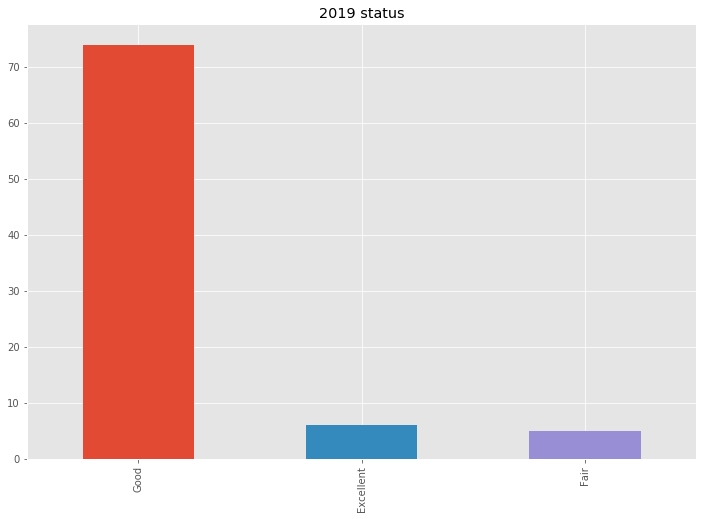

In [122]:
_ = df_cyber['status'].value_counts().plot(kind='bar')
_ = plt.title('2019 status')

In [123]:
df_cyber.columns

Index(['status', 'infected_computers', 'defaced_websites', 'defaced_gov',
       'backdoor_websites', 'backdoor_gov', 'phishing_webites',
       'new_vulnerabilities', 'high_risk'],
      dtype='object')

In [124]:
df_cyber['status_color'] = df_cyber.status.map({'Good': 'blue', 'Fair': 'orange', 'Excellent': 'green'})

Fill missing values with means

In [125]:
df_cyber.fillna(df_cyber.mean(), inplace=True)

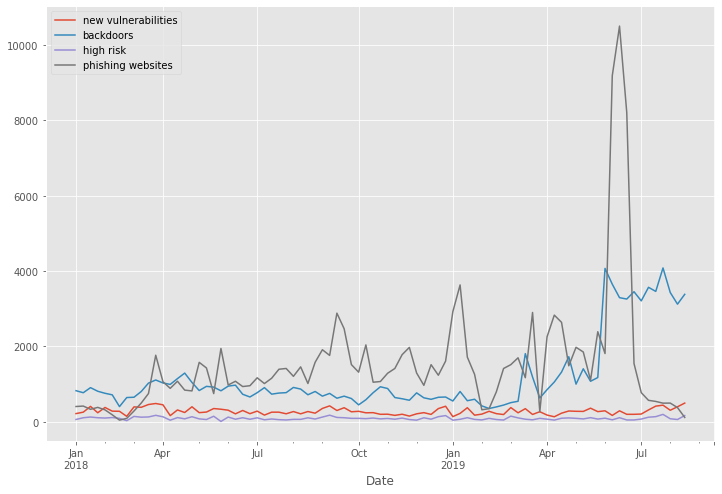

In [126]:
ax = df_cyber['new_vulnerabilities'].plot(label='new vulnerabilities')
_ = df_cyber['backdoor_websites'].plot(ax=ax, label='backdoors')
_ = df_cyber['high_risk'].plot(ax=ax, label='high risk')
_ = df_cyber['phishing_webites'].plot(ax=ax, label='phishing websites')
_ = plt.legend()

In [127]:
def plot_metric(column, kind):
    df_cyber[column].plot(kind=kind)
    plt.title(str(column))

In [128]:
df_cyber.columns

Index(['status', 'infected_computers', 'defaced_websites', 'defaced_gov',
       'backdoor_websites', 'backdoor_gov', 'phishing_webites',
       'new_vulnerabilities', 'high_risk', 'status_color'],
      dtype='object')

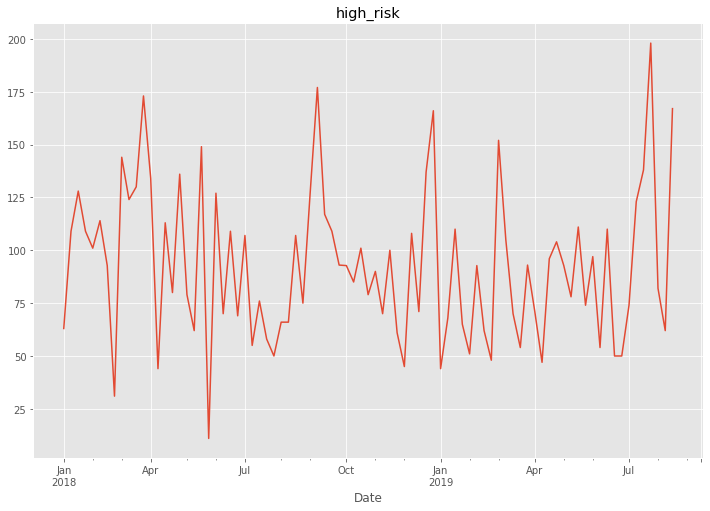

In [129]:
plot_metric('high_risk', 'line')

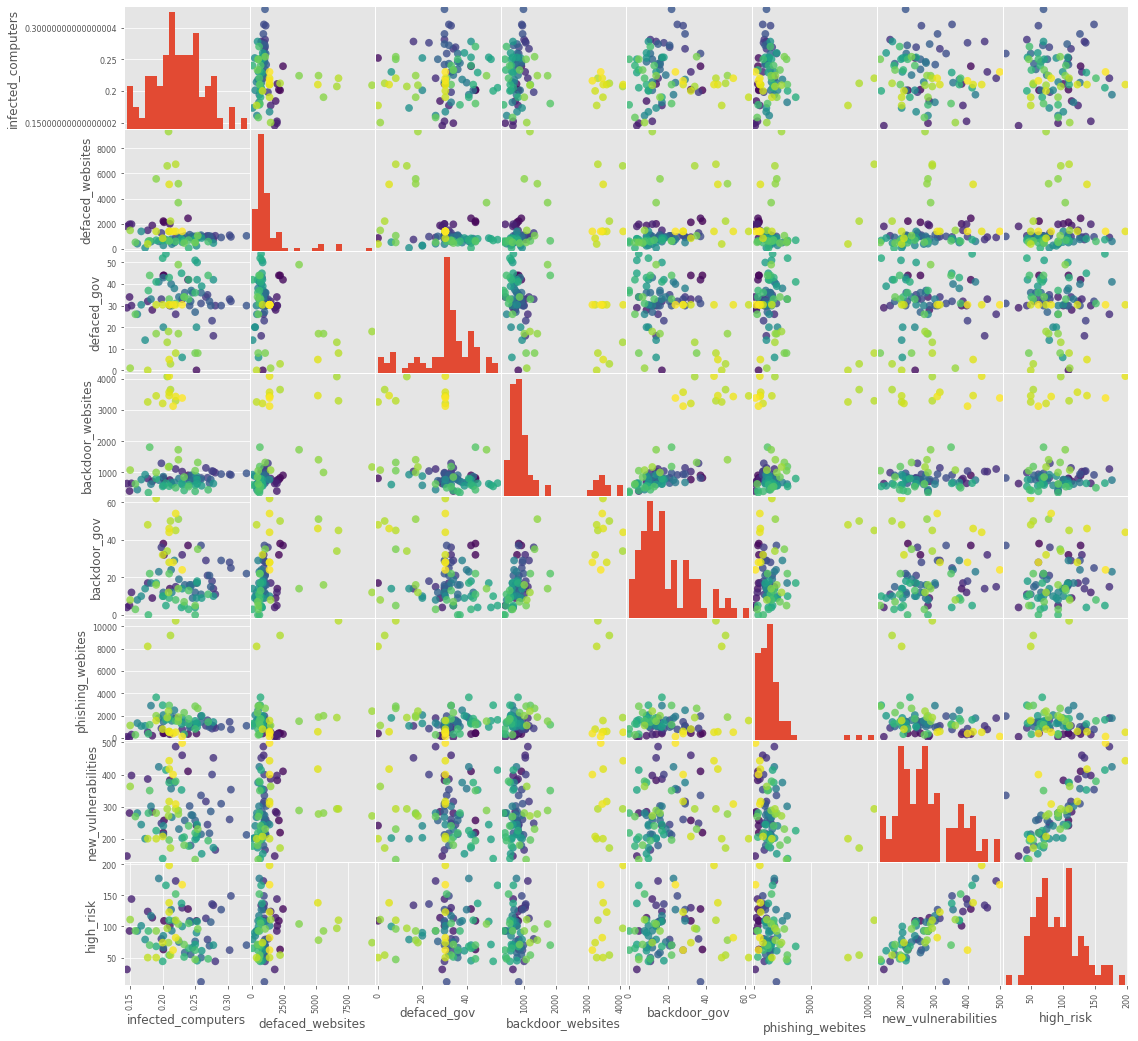

In [130]:
cyber = pd.plotting.scatter_matrix(df_cyber,figsize=(18,18), c=df_cyber.index, marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

In [131]:
corr = df_cyber.corr()

In [132]:
corr

,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
infected_computers,1.000000,-0.151112,0.101498,-0.131009,0.029350,-0.049397,-0.107164,-0.089677
defaced_websites,-0.151112,1.000000,-0.313466,0.378440,0.319633,0.227262,0.124676,0.059070
defaced_gov,0.101498,-0.313466,1.000000,-0.376988,-0.282589,-0.362981,0.011167,-0.016980
backdoor_websites,-0.131009,0.378440,-0.376988,1.000000,0.714984,0.316269,0.190146,0.112554
backdoor_gov,0.029350,0.319633,-0.282589,0.714984,1.000000,0.328038,0.177562,0.048319
phishing_webites,-0.049397,0.227262,-0.362981,0.316269,0.328038,1.000000,-0.223272,-0.182207
new_vulnerabilities,-0.107164,0.124676,0.011167,0.190146,0.177562,-0.223272,1.000000,0.796353
high_risk,-0.089677,0.059070,-0.016980,0.112554,0.048319,-0.182207,0.796353,1.000000


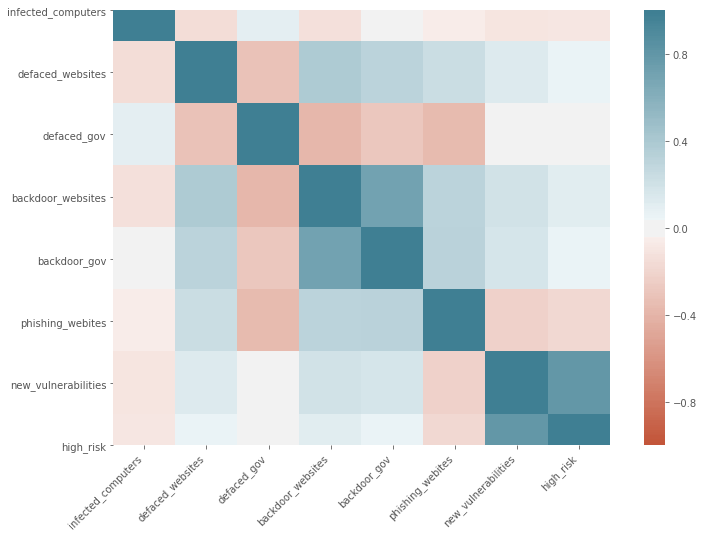

In [133]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
_ = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

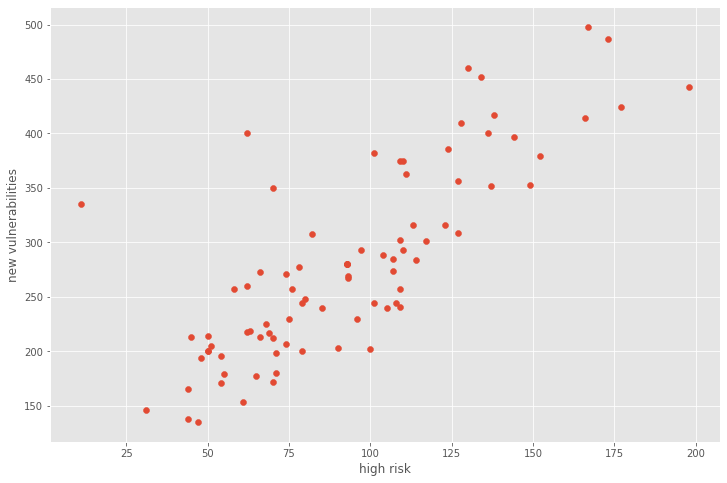

In [134]:
_ = plt.scatter(df_cyber['high_risk'], df_cyber['new_vulnerabilities'])
_ = plt.xlabel('high risk')
_ = plt.ylabel('new vulnerabilities')

/Users/christopher/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


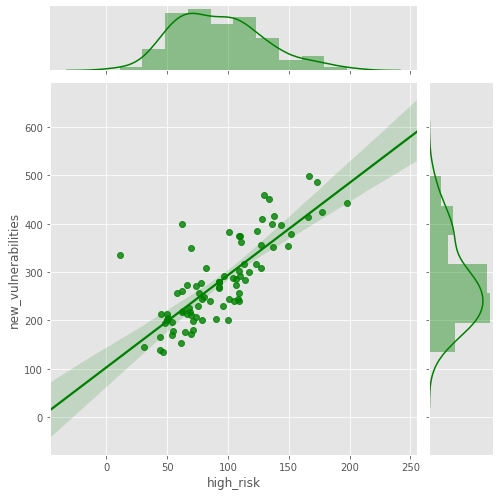

In [135]:
g = sns.jointplot("high_risk", "new_vulnerabilities", data=df_cyber, kind="reg", color="g", height=7)

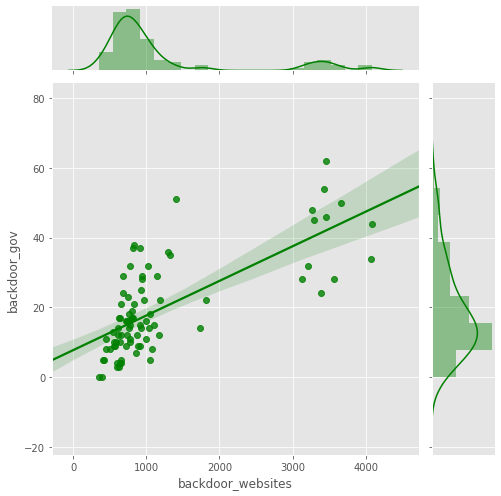

In [136]:
g2 = sns.jointplot("backdoor_websites", "backdoor_gov", data=df_cyber, kind="reg", color="g", height=7)

### Making predictions on data

In [137]:
status = df_cyber[['status']]

In [138]:
risks = df_cyber[['new_vulnerabilities', 'high_risk']]

In [139]:
risks_array = risks.values

In [140]:
status_array = status.values

In [142]:
status.loc[:,'mapped'] = status.status.map({'Fair': 0, 'Good': 1, "Excellent": 2})

In [143]:
mapped = status['mapped']

In [144]:
mapped_array = mapped.values

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(risks_array, mapped_array, random_state = 0)

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [155]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [156]:
pred = knn.predict(X_test)

In [157]:
round(np.mean(y_test == pred) * 100, 2)

95.45

In [158]:
round(knn.score(X_test, y_test) * 100, 2)

95.45

In [159]:
training_accuracy = []
test_accuracy= []


neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

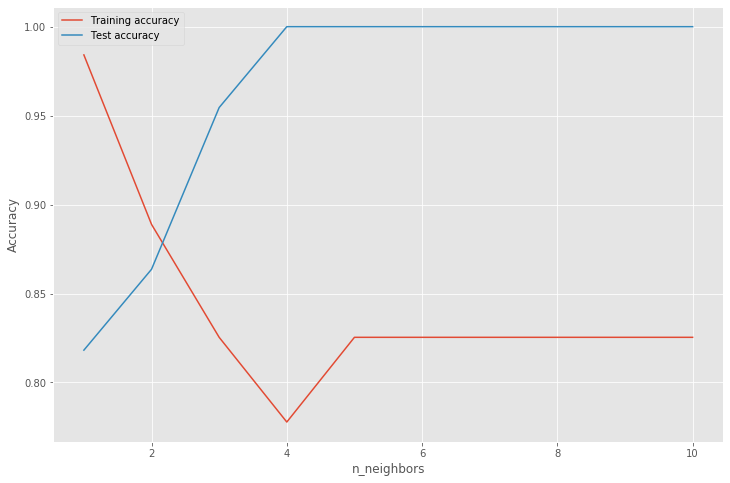

In [160]:
# Plot the results
_ = plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
_ = plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
_ = plt.ylabel("Accuracy")
_ = plt.xlabel("n_neighbors")
_ = plt.legend()